In [10]:
%run ../../utils/commonImports.py
%matplotlib inline

# Load Data

In [11]:
X_train, y_train, X_val, y_val, X_test, y_test = load_split('D:\\Dropbox\\My work\\krypl-project\\dataSplit\\03-candle-shape-sg')

# Test Train Validation Split

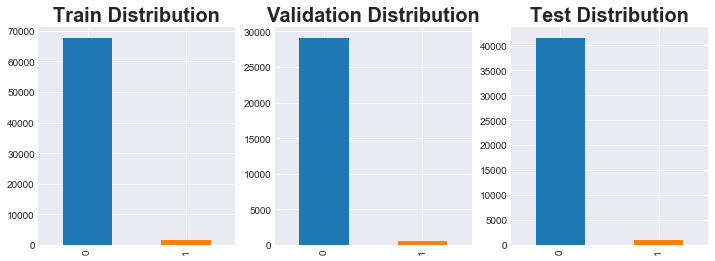

In [12]:
fig, axes = plt.subplots(1, 3, figsize=[12, 4])
y_train.value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('Train Distribution', fontproperties=title_font)
y_val.value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title('Validation Distribution', fontproperties=title_font)
y_test.value_counts().plot(kind='bar', ax=axes[2])
axes[2].set_title('Test Distribution', fontproperties=title_font);

In [13]:
X_train.describe()

,sg_close_high_ratio_zscore288,sg_open_high_ratio_zscore288,sg_low_high_ratio_zscore288,sg_open_close_ratio_zscore288,sg_close_high_ratio_zscore288_lag_1,sg_close_high_ratio_zscore288_lag_2,sg_close_high_ratio_zscore288_lag_3,sg_close_high_ratio_zscore288_lag_4,sg_close_high_ratio_zscore288_lag_5,sg_close_high_ratio_zscore288_lag_6,...,sg_open_close_ratio_zscore288_lag_1,sg_open_close_ratio_zscore288_lag_2,sg_open_close_ratio_zscore288_lag_3,sg_open_close_ratio_zscore288_lag_4,sg_open_close_ratio_zscore288_lag_5,sg_open_close_ratio_zscore288_lag_6,sg_open_close_ratio_zscore288_lag_7,sg_open_close_ratio_zscore288_lag_8,sg_open_close_ratio_zscore288_lag_9,sg_close_std_w_288
count,"69,289.0000","69,289.0000","69,289.0000","69,289.0000","69,289.0000","69,289.0000","69,289.0000","69,289.0000","69,289.0000","69,289.0000",...,"69,289.0000","69,289.0000","69,289.0000","69,289.0000","69,289.0000","69,289.0000","69,289.0000","69,289.0000","69,289.0000","69,289.0000"
mean,-0.0148,-0.0141,-0.0103,0.0058,-0.0160,-0.0194,-0.0181,-0.0174,-0.0140,-0.0137,...,0.0056,0.0114,0.0089,0.0111,0.0075,0.0083,0.0094,0.0045,0.0062,23.1235
std,1.0938,1.0899,1.1236,1.0515,1.0939,1.1002,1.0970,1.0951,1.0972,1.0971,...,1.0573,1.0546,1.0622,1.0562,1.0587,1.0565,1.0609,1.0530,1.0536,31.4629
min,-27.7103,-23.0010,-35.2287,-14.9613,-16.5812,-27.7103,-17.4661,-19.6700,-27.7103,-27.7103,...,-17.7256,-14.9613,-17.7256,-14.9613,-10.1597,-17.7256,-17.7256,-14.9613,-10.1597,0.5963
25%,-0.4909,-0.5009,-0.4886,-0.5720,-0.4936,-0.4968,-0.4944,-0.4951,-0.4932,-0.4879,...,-0.5680,-0.5662,-0.5677,-0.5631,-0.5681,-0.5678,-0.5666,-0.5706,-0.5730,3.4112
50%,0.2064,0.1952,0.2015,-0.0151,0.2050,0.2037,0.2032,0.2017,0.2068,0.2092,...,-0.0133,-0.0060,-0.0077,-0.0047,-0.0100,-0.0090,-0.0092,-0.0109,-0.0090,9.5500
75%,0.6924,0.6908,0.7030,0.5606,0.6904,0.6872,0.6902,0.6899,0.6912,0.6875,...,0.5610,0.5630,0.5612,0.5623,0.5602,0.5612,0.5632,0.5602,0.5605,31.4425
max,3.4381,3.1587,3.2700,15.7067,3.4381,3.4381,3.4381,3.4381,3.3486,3.7825,...,15.8543,14.7571,15.7067,20.9074,15.8543,20.9074,20.9074,15.8543,15.8543,281.0633


# Decision Tree

In [14]:
import time
from modeling.gridsearch import GridSearch
from sklearn.tree import DecisionTreeClassifier

params_to_train = {
    'max_depth': [5, 8, 10, 12],
    'min_samples_split': [10, 30, 50],
    'class_weight': [{0: 1, 1:i}  for i in range(1, 6)]
}

grid_search = GridSearch(DecisionTreeClassifier, params_to_train)
grid_search.fit_all(X_train, y_train)

path = "D:\\Dropbox\\My work\\krypl-project\\models\\03-candle-shape-sg"
save_model(grid_search, f'{path}\\tree_search.pkl');

train [0/60] {'max_depth': 5, 'min_samples_split': 10, 'class_weight': {0: 1, 1: 1}}........................... 2.81 sec
train [1/60] {'max_depth': 5, 'min_samples_split': 10, 'class_weight': {0: 1, 1: 2}}........................... 2.79 sec
train [2/60] {'max_depth': 5, 'min_samples_split': 10, 'class_weight': {0: 1, 1: 3}}........................... 4.50 sec
train [3/60] {'max_depth': 5, 'min_samples_split': 10, 'class_weight': {0: 1, 1: 4}}........................... 3.96 sec
train [4/60] {'max_depth': 5, 'min_samples_split': 10, 'class_weight': {0: 1, 1: 5}}........................... 2.75 sec
train [5/60] {'max_depth': 5, 'min_samples_split': 30, 'class_weight': {0: 1, 1: 1}}........................... 2.53 sec
train [6/60] {'max_depth': 5, 'min_samples_split': 30, 'class_weight': {0: 1, 1: 2}}........................... 2.50 sec
train [7/60] {'max_depth': 5, 'min_samples_split': 30, 'class_weight': {0: 1, 1: 3}}........................... 2.51 sec
train [8/60] {'max_depth': 5, 'm